## **사회적 거리두기의 영향 및 유동인구와 확진자수와의 상관관계- 코로나 데이터 시각화**

  1. 일별 확진자수
  2. 날짜별 유동인구의 변화
  3. 날짜별 확진자수와 유동인구
  4. 연령대별 유동인구와 확진자수
  5. 장소별 유동인구

In [0]:
#모듈 불러오기 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.offline as py

import folium 
from folium import plugins

from datetime import date, timedelta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#코로나 데이터셋 업로드

from google.colab import files
uploaded = files.upload() #11개 데이터파일 업로드

Saving Case.csv to Case.csv
Saving PatientInfo.csv to PatientInfo.csv
Saving PatientRoute.csv to PatientRoute.csv
Saving Policy.csv to Policy.csv
Saving Region.csv to Region.csv
Saving SearchTrend.csv to SearchTrend.csv
Saving SeoulFloating.csv to SeoulFloating.csv
Saving Time.csv to Time.csv
Saving TimeAge.csv to TimeAge.csv
Saving TimeGender.csv to TimeGender.csv
Saving TimeProvince.csv to TimeProvince.csv
Saving Weather.csv to Weather.csv


In [0]:
case = pd.read_csv("Case.csv")
patient_info = pd.read_csv("PatientInfo.csv")
patient_route = pd.read_csv("PatientRoute.csv")
region = pd.read_csv("Region.csv")
search_trend = pd.read_csv("SearchTrend.csv")
floating = pd.read_csv("SeoulFloating.csv")
time = pd.read_csv("Time.csv")
time_age = pd.read_csv("TimeAge.csv")
time_gender = pd.read_csv("TimeGender.csv")
time_province = pd.read_csv("TimeProvince.csv")
weather = pd.read_csv("Weather.csv")

#**1. 일별 확진자수**

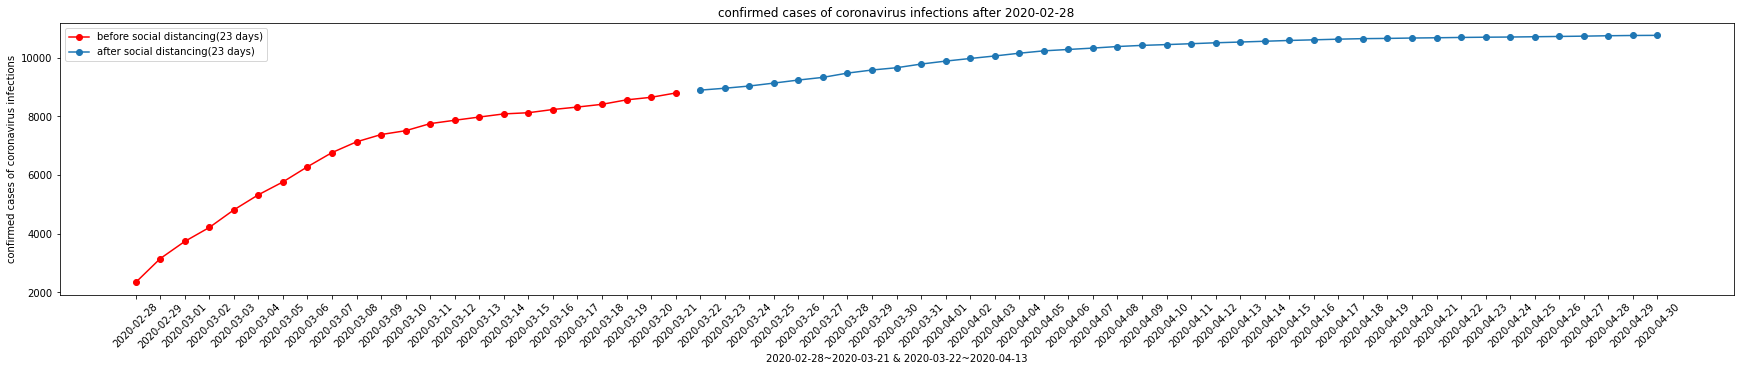

In [0]:
#사회적 거리두기 시행 이전 23일과 시행 이후 23일의 일별 확진자수를 시각화합니다.
date = time['date'] #날짜 column
conNum = time['confirmed'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5] # [width, height]

#사회적 거리두기 이전 23일 동안의 확진자수 그래프 그리기
xbefore=date[39:62] # 2월 28일 ~ 3월 21일을 x축으로 지정
ybefore=conNum[39:62] # 2월 28일 ~ 3월 21일의 확진자수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', color='r', label='before social distancing(23 days)')

#사회적 거리두기 이후 23일 동안의 확진자수 그래프 그리기
xafter=date[62:len(date)] # 사회적 거리두기 시작일인 3월 22일부터 4월 13일을 x축으로 지정
yafter=conNum[62:len(conNum)] # 사회적 거리두기 시작일인 3월 22일부터 4월 13일까지의 확진자수를 y축으로 지정
plt.plot(xafter, yafter, marker='o', label='after social distancing(23 days)')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.xlabel("2020-02-28~2020-03-21 & 2020-03-22~2020-04-13")
plt.ylabel("confirmed cases of coronavirus infections")
plt.title("confirmed cases of coronavirus infections after 2020-02-28")
plt.legend()
plt.show()

3/22 부터 사회적 거리두기가 실시된 이후로 확진자수 증가율이 감소한 것을 볼 수 있다. 

# **2. 날짜별 유동인구의 변화**

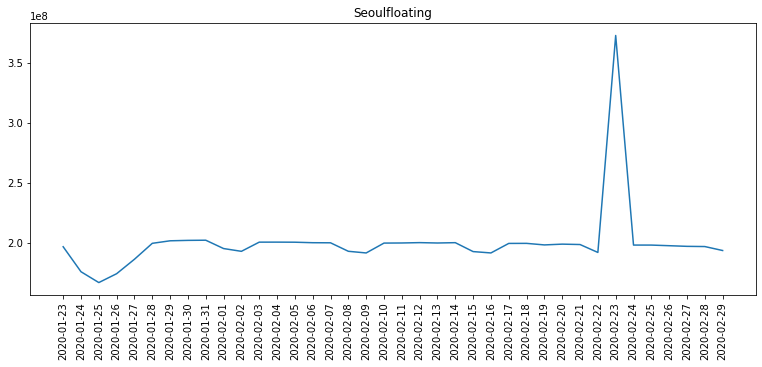

In [0]:
# ax = realdf.plot(kind='line', title='fp', figsize=(12, 4), legend=True, fontsize=12)
# ax.set_xlabel('date', fontsize=12)          # x축 정보 표시
# ax.set_ylabel('fp', fontsize=12)     # y축 정보 표시
# ax.legend(['fp'], fontsize=12)    # 범례 지정

#날짜 나눠주기
df = pd.read_csv('SeoulFloating.csv')
df1 = df[158400:158400+7200]
df2 = df[165600:165600+7200]
df3 = df[172800:172800+7200]
df4 = df[180000:180000+7200]
df5 = df[187200:187200+7200]
df6 = df[194400:194400+7200]
df7 = df[201600:201600+7200]
df8 = df[208800:208800+7200]
df9 = df[216000:216000+7200]
df10 = df[223200:223200+7200]
df11 = df[230400:230400+7200]
df12 = df[237600:237600+7200]
df13 = df[244800:244800+7200]
df14 = df[252000:252000+7200]
df15 = df[259200:259200+7200]
df16 = df[266400:266400+7200]
df17 = df[273600:273600+7200]
df18 = df[280800:280800+7200]
df19 = df[288000:288000+7200]
df20 = df[295200:295200+7200]
df21 = df[302400:302400+7200]
df22 = df[309600:309600+7200]
df23 = df[316800:316800+7200]
df24 = df[324000:324000+7200]
df25 = df[331200:331200+7200]
df26 = df[338400:338400+7200]
df27 = df[345600:345600+7200]
df28 = df[352800:352800+7200]
df29 = df[360000:360000+7200]
df30 = df[367200:367200+7200]
df31 = df[374400:374400+7200]
df32 = df[381600:381600+7200]
df33 = df[388800:388800+7200]
df34 = df[396000:396000+7200]
df35 = df[403200:403200+7200]
df36 = df[410400:410400+7200]
df37 = df[417600:417600+7200]
df38 = df[424800:424800+7200]
floating1 = df1.groupby(['date'])[['fp_num']].sum()
floating2 = df2.groupby(['date'])[['fp_num']].sum()
floating3 = df3.groupby(['date'])[['fp_num']].sum()
floating4 = df4.groupby(['date'])[['fp_num']].sum()
floating5 = df5.groupby(['date'])[['fp_num']].sum()
floating6 = df6.groupby(['date'])[['fp_num']].sum()
floating7 = df7.groupby(['date'])[['fp_num']].sum()
floating8 = df8.groupby(['date'])[['fp_num']].sum()
floating9 = df9.groupby(['date'])[['fp_num']].sum()
floating10 = df10.groupby(['date'])[['fp_num']].sum()
floating11 = df11.groupby(['date'])[['fp_num']].sum()
floating12 = df12.groupby(['date'])[['fp_num']].sum()
floating13 = df13.groupby(['date'])[['fp_num']].sum()
floating14 = df14.groupby(['date'])[['fp_num']].sum()
floating15 = df15.groupby(['date'])[['fp_num']].sum()
floating16 = df16.groupby(['date'])[['fp_num']].sum()
floating17 = df17.groupby(['date'])[['fp_num']].sum()
floating18 = df18.groupby(['date'])[['fp_num']].sum()
floating19 = df19.groupby(['date'])[['fp_num']].sum()
floating20 = df20.groupby(['date'])[['fp_num']].sum()
floating21 = df21.groupby(['date'])[['fp_num']].sum()
floating22 = df22.groupby(['date'])[['fp_num']].sum()
floating23 = df23.groupby(['date'])[['fp_num']].sum()
floating24 = df24.groupby(['date'])[['fp_num']].sum()
floating25 = df25.groupby(['date'])[['fp_num']].sum()
floating26 = df26.groupby(['date'])[['fp_num']].sum()
floating27 = df27.groupby(['date'])[['fp_num']].sum()
floating28 = df28.groupby(['date'])[['fp_num']].sum()
floating29 = df29.groupby(['date'])[['fp_num']].sum()
floating30 = df30.groupby(['date'])[['fp_num']].sum()
floating31 = df31.groupby(['date'])[['fp_num']].sum()
floating32 = df32.groupby(['date'])[['fp_num']].sum()
floating33 = df33.groupby(['date'])[['fp_num']].sum()
floating34 = df34.groupby(['date'])[['fp_num']].sum()
floating35 = df35.groupby(['date'])[['fp_num']].sum()
floating36 = df36.groupby(['date'])[['fp_num']].sum()
floating37 = df37.groupby(['date'])[['fp_num']].sum()
floating38 = df38.groupby(['date'])[['fp_num']].sum()
floatingAll = pd.concat([floating1,floating2,floating3,floating4,floating5,floating6,floating7,floating8,floating9,floating10,floating11,floating12,floating13,floating14, floating15,floating16,floating17,floating18,floating19,floating20, floating21,floating22,floating23,floating24,floating25,floating26,floating27,floating28,floating29,floating30,floating31,floating32,floating33,floating34,floating35, floating36,floating37,floating38])
x=floatingAll.index
y=floatingAll['fp_num']
plt.figure(figsize=(13,5))
plt.xticks(rotation = 90)
plt.plot(x,y)
plt.title('Seoulfloating')
plt.show()

2/23일의 서울시 유동인구 수가 다른 날에 비해 확연히 높다는 것을 확인하였고, 해당 데이터에 오류가 의심되었다. 


# **3. 날짜별 확진률과 유동인구**

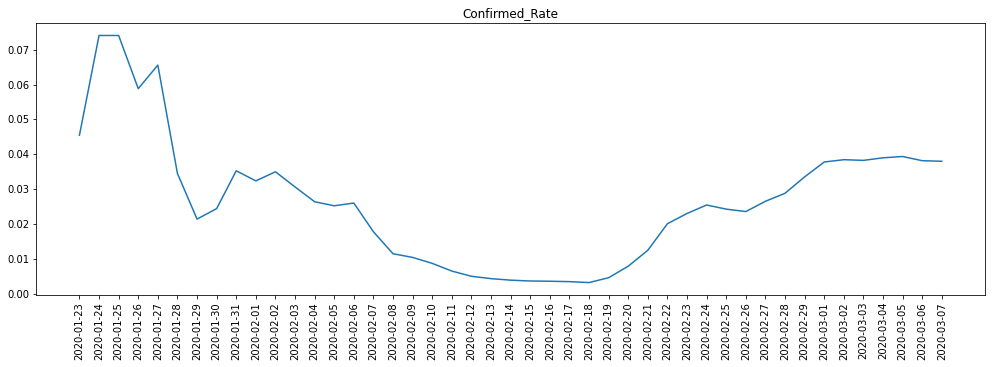

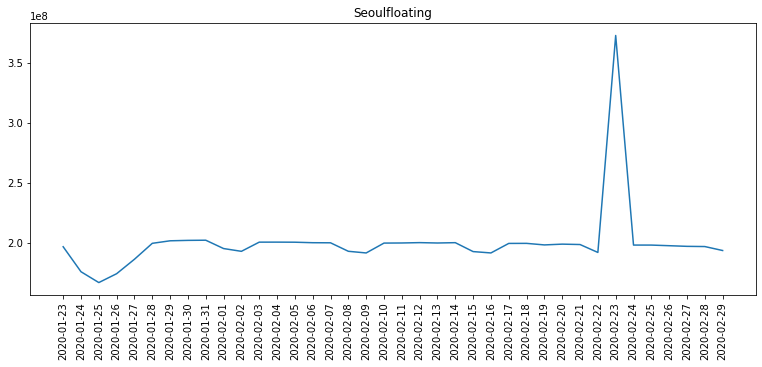

3     0.045455
4     0.074074
5     0.074074
6     0.058824
7     0.065574
8     0.034483
9     0.021390
10    0.024390
11    0.035256
12    0.032345
13    0.034965
14    0.030612
15    0.026359
16    0.025210
17    0.025989
18    0.017751
19    0.011445
20    0.010393
21    0.008682
22    0.006474
23    0.004979
24    0.004300
25    0.003866
26    0.003620
27    0.003553
28    0.003441
29    0.003172
30    0.004565
31    0.007878
32    0.012439
33    0.020059
34    0.022996
35    0.025430
36    0.024241
37    0.023547
38    0.026496
39    0.028792
40    0.033491
41    0.037768
42    0.038434
43    0.038236
44    0.038974
45    0.039347
46    0.038145
47    0.037977
dtype: float64


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.offline as py

import folium 
from folium import plugins

from datetime import date, timedelta

df = pd.read_csv('SeoulFloating.csv')
patient_info = pd.read_csv("PatientInfo.csv")
time = pd.read_csv('Time.csv')
#dataFrame에서 date, fp_num 행 남겨둠. 
df = df.drop(['hour','sex', 'birth_year', 'province','city'], axis = 1)
#확진률 알아보기

new_confirmed = time['confirmed']
new_test = time['test']
#날짜
confirmed_date=time['date']
confirmed_date = confirmed_date[3:48]
#confirmed_date = confirmed_date.values

confirmed_rate = new_confirmed[3:48]/new_test[3:48]   # 확진률의 경향성을 보기 위해 변화가 미미한 부분은 제외
#cpnfirmed_date = confirmed_date.values
#confirmed_rate3 = np.append(confirmed_rate,confirmed_rate2)
plt.figure(figsize=(17,5))
plt.title("Confirmed_Rate")
plt.xticks(rotation = 90)
plt.plot(confirmed_date, confirmed_rate)
plt.show

plt.figure(figsize=(13,5))
plt.xticks(rotation = 90)
plt.plot(x,y)
plt.title('Seoulfloating')
plt.show()


print(confirmed_rate)


앞서 2/23일의 유동인구가 상대적으로 극단치를 가지면서 데이터의 오류를 의심해 보았으나, 2/23 이후 다시 확진자수가 증가 추세를 보이는 것을 통해 이와의 상관관계를 확인해 볼 수 있었다. 

# **4. 연령대별 확진자수와 유동인구**



유동인구 데이터 정리하기

In [0]:
#유동인구 연령대별로 분류
floating_20= floating.query('birth_year==20')
floating_30= floating.query('birth_year==30')
floating_40= floating.query('birth_year==40')
floating_50= floating.query('birth_year==50')
floating_60= floating.query('birth_year==60')
floating_70= floating.query('birth_year==70')

#dataFrame에서 date, fp_num 행 외에는 필요가 없으므로 이들만 남겨둠. 
floating_20 = floating_20.loc[:,['date', 'fp_num']]
floating_30 = floating_30.loc[:,['date', 'fp_num']]
floating_40 = floating_40.loc[:,['date', 'fp_num']]
floating_50 = floating_50.loc[:,['date', 'fp_num']]
floating_60 = floating_60.loc[:,['date', 'fp_num']]
floating_70 = floating_70.loc[:,['date', 'fp_num']]

#각 날짜에 해당하는 인원 수 합치기
floating_20 = floating_20.groupby(['date'])[['fp_num']].sum()
floating_30 = floating_30.groupby(['date'])[['fp_num']].sum()
floating_40 = floating_40.groupby(['date'])[['fp_num']].sum()
floating_50 = floating_50.groupby(['date'])[['fp_num']].sum()
floating_60 = floating_60.groupby(['date'])[['fp_num']].sum()
floating_70 = floating_70.groupby(['date'])[['fp_num']].sum()

#날짜를 1월 22일부터로 설정. (코로나 확진 환자 처음 생긴 날)
floating_20_date_modify = floating_20[21:]
floating_30_date_modify = floating_30[21:]
floating_40_date_modify = floating_40[21:]
floating_50_date_modify = floating_50[21:]
floating_60_date_modify = floating_60[21:]
floating_70_date_modify = floating_70[21:]

#index 초기화해주기
floating_20_date_modify1 = floating_20_date_modify.reset_index()
floating_30_date_modify1 = floating_30_date_modify.reset_index()
floating_40_date_modify1 = floating_40_date_modify.reset_index()
floating_50_date_modify1 = floating_50_date_modify.reset_index()
floating_60_date_modify1 = floating_60_date_modify.reset_index()
floating_70_date_modify1 = floating_70_date_modify.reset_index()

각 연령별 floating data에서 2/23일의 유동인구가 유독 높다는 것을 확인하였고, 해당 날짜에 오류가 있는 것은 아닐까라는 생각을 하여 2/23일의 유동인구와 2/24의 유동인구의 비를 계산해보았다.

20대: 68317330/35458810=1.92666730779

30대: 75618000/39129240=1.93251900625

40대: 75213860/38687160=1.944155632

50대: 72242970/37049750=1.94989088995

60대: 46625190/23910890=1.94995627515

70대: 35070200/17966010=1.95203052876

모든 연령대에서 비슷한 비율로 2/23일의 유동인구가 유독 많다는 것을 보았을 때,
시스템의 오류로 판단을 해도 될 것 같다는 생각이 들어 해당 인구 숫자에 1/1.94를 곱하기로 결정했다.

In [0]:
floating_20_date_modify1.at[32, 'fp_num'] = floating_20_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_30_date_modify1.at[32, 'fp_num'] = floating_30_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_40_date_modify1.at[32, 'fp_num'] = floating_40_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_50_date_modify1.at[32, 'fp_num'] = floating_50_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_60_date_modify1.at[32, 'fp_num'] = floating_60_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_70_date_modify1.at[32, 'fp_num'] = floating_70_date_modify1.at[32, 'fp_num']*(1/1.92)

In [0]:
floating_20_date_modify1

,date,fp_num
0,2020-01-22,36066830
1,2020-01-23,34611120
2,2020-01-24,29333360
3,2020-01-25,26769130
4,2020-01-26,29136330
5,2020-01-27,32257380
6,2020-01-28,35252650
7,2020-01-29,35902220
8,2020-01-30,36084690
9,2020-01-31,36278930


환자 데이터 정리하기 

In [0]:
#서울 사람들만 분류
patient = patient_info.query('province == "Seoul"')

#환자 연령대별로 분류
patient_20= patient.query('age=="20s"')
patient_30= patient.query('age=="30s"')
patient_40= patient.query('age=="40s"')
patient_50= patient.query('age=="50s"')
patient_60= patient.query('age=="60s"')
patient_70= patient.query('age=="70s"')

#confirmed_date column만 불러온다
patient_20 = patient_20.loc[:,['confirmed_date']]
patient_30 = patient_30.loc[:,['confirmed_date']]
patient_40 = patient_40.loc[:,['confirmed_date']]
patient_50 = patient_50.loc[:,['confirmed_date']]
patient_60 = patient_60.loc[:,['confirmed_date']]
patient_70 = patient_70.loc[:,['confirmed_date']]

#각 날짜별 사람 수 통합
#인원수 파악을 위해 1이 들어간 column 새로 만들어 준다
patient_20['patient']=np.nan
patient_20.loc[:,['patient']]=1
patient_30['patient']=np.nan
patient_30.loc[:,['patient']]=1
patient_40['patient']=np.nan
patient_40.loc[:,['patient']]=1
patient_50['patient']=np.nan
patient_50.loc[:,['patient']]=1
patient_60['patient']=np.nan
patient_60.loc[:,['patient']]=1
patient_70['patient']=np.nan
patient_70.loc[:,['patient']]=1

#각 날짜별 확진자 수 
patient_20 = patient_20.groupby(['confirmed_date'])[['patient']].sum()
patient_20.columns.name = 'date'
patient_30 = patient_30.groupby(['confirmed_date'])[['patient']].sum()
patient_30.columns.name = 'date'
patient_40 = patient_40.groupby(['confirmed_date'])[['patient']].sum()
patient_40.columns.name = 'date'
patient_50 = patient_50.groupby(['confirmed_date'])[['patient']].sum()
patient_50.columns.name = 'date'
patient_60 = patient_60.groupby(['confirmed_date'])[['patient']].sum()
patient_60.columns.name = 'date'
patient_70 = patient_70.groupby(['confirmed_date'])[['patient']].sum()
patient_70.columns.name = 'date'

#index 초기화
patient_20=patient_20.reset_index()
patient_30=patient_30.reset_index()
patient_40=patient_40.reset_index()
patient_50=patient_50.reset_index()
patient_60=patient_60.reset_index()
patient_70=patient_70.reset_index()

#이후에 merge 할 수 있게 patient data의 column 이름을 floating data의 column과 똑같이 맞춰준다
#또한, 아직 floating data가 2/29일까지 없으므로 floating data는 2/29일까지, 확진자 데이터는 2/29일에서 14일 후인 3/14일까지 나타냈음.
#각 patient data를 3/14일까지의 데이터로만 추리는 작업은 각 set을 보고 몇 번째 col이 3/14인지 체크하는 수작업을 했음. 
patient_20.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_20_2=patient_20[:21]
patient_30.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_30_2=patient_30[:20] #col값 확인하고 다 바꿔줘야해
patient_40.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_40_2=patient_40[:13]
patient_50.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_50_2=patient_50[:21]
patient_60.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_60_2=patient_60[:16]
patient_70.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_70_2=patient_70[:8]

#각 날짜에 대한 유동인구, 확진자 수 한 dataFrame에 묶기
#Nan data에는 0을 넣어줌. 
combine_20_2= pd.merge(floating_20_date_modify1,patient_20_2,how='outer',on='date')
combine_20_2 = combine_20_2.fillna(0)
combine_30_2= pd.merge(floating_30_date_modify1,patient_30_2,how='outer',on='date')
combine_30_2 = combine_30_2.fillna(0)
combine_40_2= pd.merge(floating_40_date_modify1,patient_40_2,how='outer',on='date')
combine_40_2 = combine_40_2.fillna(0)
combine_50_2= pd.merge(floating_50_date_modify1,patient_50_2,how='outer',on='date')
combine_50_2 = combine_50_2.fillna(0)
combine_60_2= pd.merge(floating_60_date_modify1,patient_60_2,how='outer',on='date')
combine_60_2 = combine_60_2.fillna(0)
combine_70_2= pd.merge(floating_70_date_modify1,patient_70_2,how='outer',on='date')
combine_70_2 = combine_70_2.fillna(0)

In [0]:
patient_20

date,date,patient
0,2020-01-30,1
1,2020-01-31,2
2,2020-02-02,1
3,2020-02-07,1
4,2020-02-20,1
5,2020-02-24,1
6,2020-02-26,5
7,2020-02-27,4
8,2020-02-28,1
9,2020-02-29,3


In [0]:
combine_20_2

,date,fp_num,patient
0,2020-01-22,36066830.0,0.0
1,2020-01-23,34611120.0,0.0
2,2020-01-24,29333360.0,0.0
3,2020-01-25,26769130.0,0.0
4,2020-01-26,29136330.0,0.0
5,2020-01-27,32257380.0,0.0
6,2020-01-28,35252650.0,0.0
7,2020-01-29,35902220.0,0.0
8,2020-01-30,36084690.0,1.0
9,2020-01-31,36278930.0,2.0


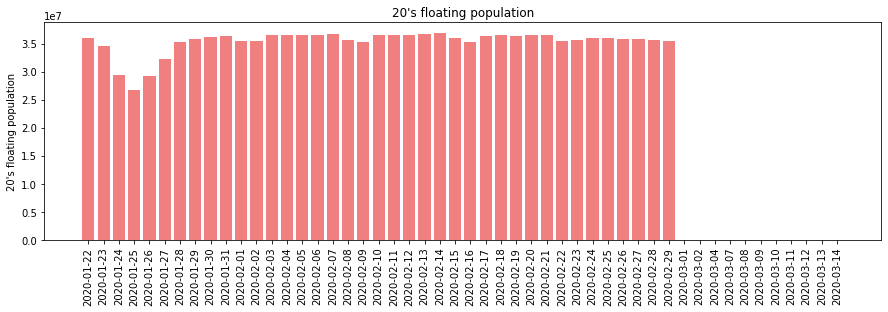

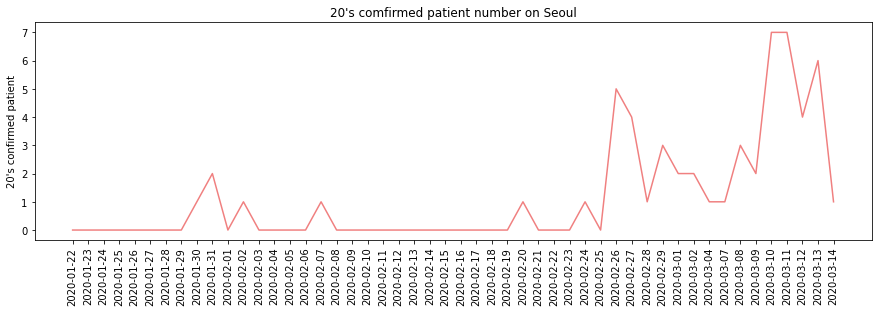

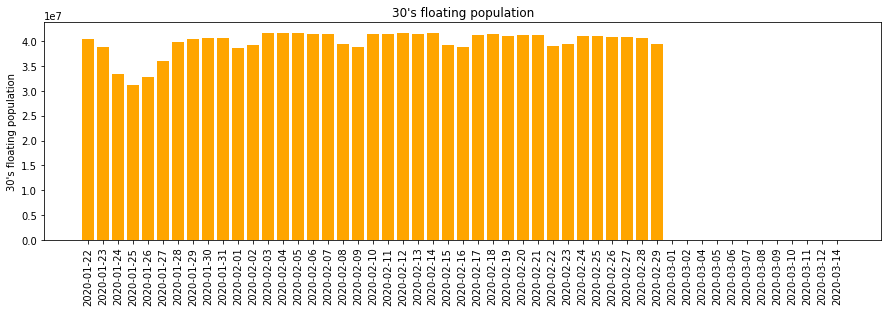

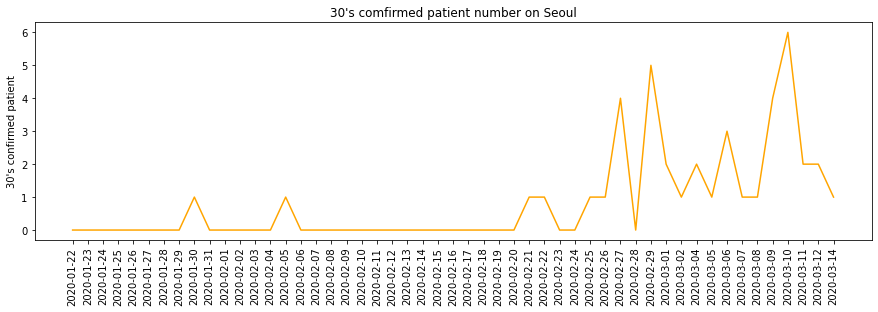

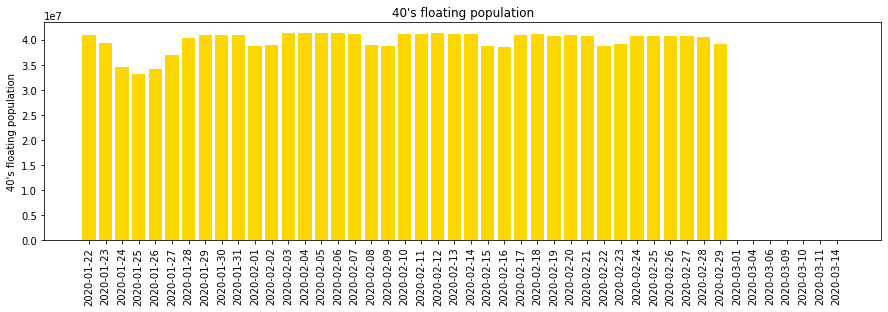

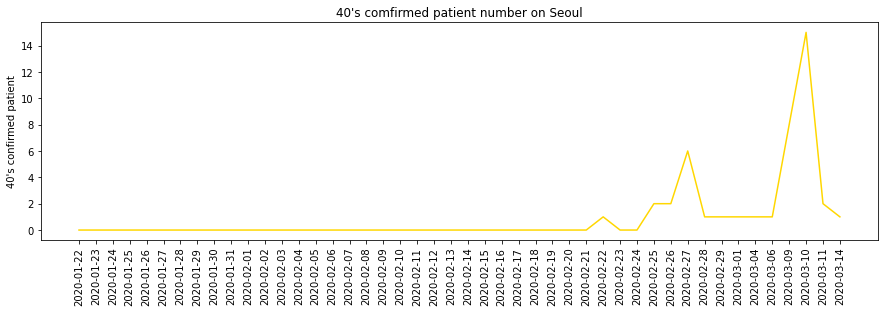

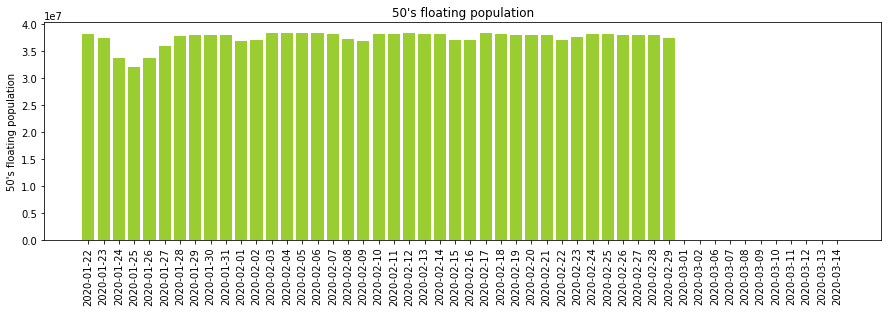

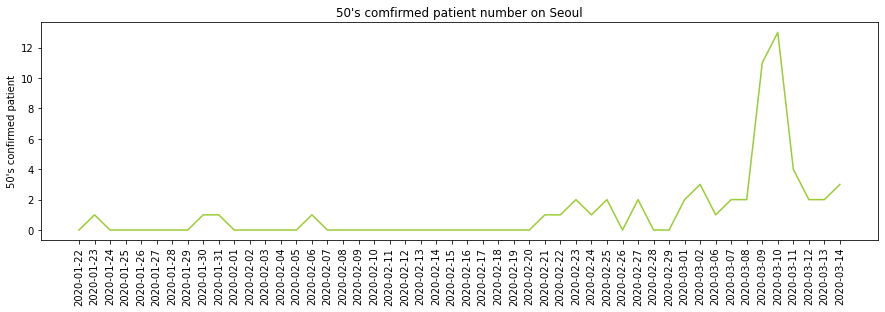

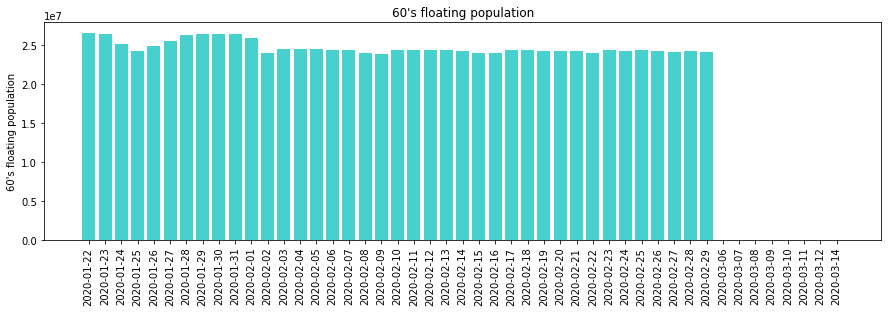

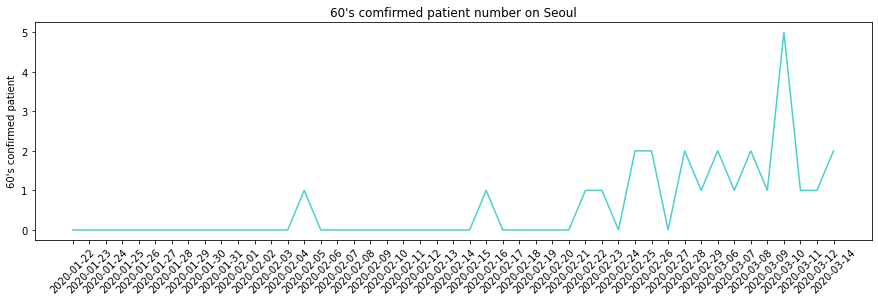

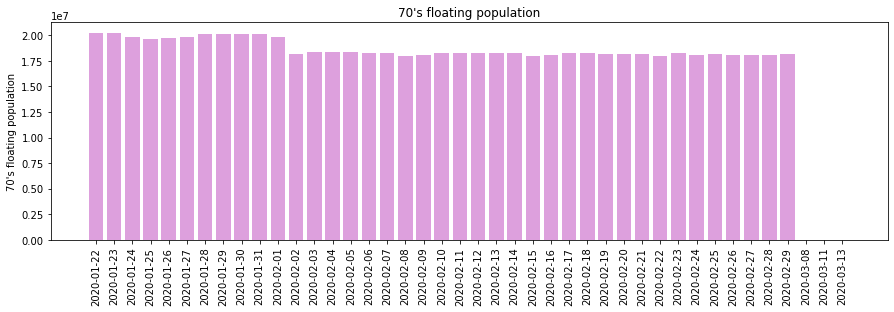

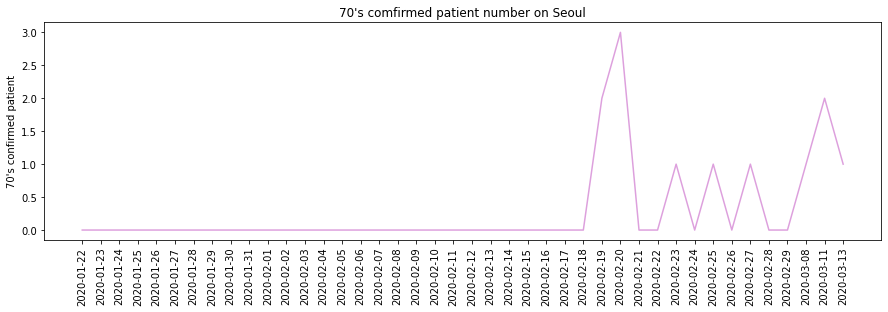

In [0]:
#그래프 그리기

#20대
x= combine_20_2['date']
y1= combine_20_2['patient']
y2= combine_20_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='lightcoral')
plt.title("20's floating population")
plt.xticks(rotation=90)
plt.ylabel("20's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='lightcoral')
plt.title("20's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("20's confirmed patient")
plt.show()

#30대
x= combine_30_2['date']
y1= combine_30_2['patient']
y2= combine_30_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='orange')
plt.title("30's floating population")
plt.xticks(rotation=90)
plt.ylabel("30's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='orange')
plt.title("30's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("30's confirmed patient")
plt.show()

#40대 
x= combine_40_2['date']
y1= combine_40_2['patient']
y2= combine_40_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='gold')
plt.title("40's floating population")
plt.xticks(rotation=90)
plt.ylabel("40's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='gold')
plt.title("40's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("40's confirmed patient")
plt.show()

#50대
x= combine_50_2['date']
y1= combine_50_2['patient']
y2= combine_50_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='yellowgreen')
plt.title("50's floating population")
plt.xticks(rotation=90)
plt.ylabel("50's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='yellowgreen')
plt.title("50's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("50's confirmed patient")
plt.show()

#60대
x= combine_60_2['date']
y1= combine_60_2['patient']
y2= combine_60_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='mediumturquoise')
plt.title("60's floating population")
plt.xticks(rotation=90)
plt.ylabel("60's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='mediumturquoise')
plt.title("60's comfirmed patient number on Seoul")
plt.xticks(rotation=45)
plt.ylabel("60's confirmed patient")
plt.show()

#70대
x= combine_70_2['date']
y1= combine_70_2['patient']
y2= combine_70_2['fp_num']
plt.figure(figsize=(15,4))
plt.bar(x,y2,color='plum')
plt.title("70's floating population")
plt.xticks(rotation=90)
plt.ylabel("70's floating population")
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x,y1,color='plum')
plt.title("70's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("70's confirmed patient")
plt.show()

2/23일의 극단값을 오류로 고려했을 때, 설 연휴에 잠시 줄어들었다가 이후에는 주말에만 조금 줄어드는 반복되는 패턴을 가진 20, 30, 40, 50대의 유동인구 변화 추이가 비슷하고, 설 연휴에 줄어들었다가 2/1일 이후에 이전보다 줄어든 추세를 보이는 60,70대의 유동인구 변화가 비슷하다는 것을 알 수 있다. 

감염자의 증감은 연령대별로 크게 다르지 않은 양상을 보이는 것을 알 수 있는데, 3/10에 구로 콜센터 집단감염 사례로 인해 연령대마다 숫자가 크게 증가한 것을 볼 수 있다. 

# **5. 장소별 확진자수**

In [0]:
#Case-> 집단감염인 경우(gromp:TRUE)인 데이터를 가져온다
group_infection = case.loc[case.group==1]
print(group_infection)

#감염 장소별 확진 인원
place_infected = group_infection.groupby(['infection_case'])[['confirmed']].sum()
place_infected.columns.name = 'cases'
print(place_infected)

     case_id          province  ...   latitude   longitude
0    1000001             Seoul  ...  37.508163  126.884387
1    1000002             Seoul  ...  37.592888  127.056766
2    1000003             Seoul  ...  37.481059  126.894343
3    1000004             Seoul  ...   37.63369    126.9165
4    1000005             Seoul  ...   37.55713    127.0403
..       ...               ...  ...        ...         ...
101  6100003  Gyeongsangnam-do  ...  35.805681  127.917805
102  6100004  Gyeongsangnam-do  ...  35.164845  128.126969
103  6100005  Gyeongsangnam-do  ...   35.22115    128.6866
104  6100006  Gyeongsangnam-do  ...   35.54127    128.5008
105  6100007  Gyeongsangnam-do  ...          -           -

[62 rows x 8 columns]
cases                                  confirmed
infection_case                                  
Bonghwa Pureun Nursing Home                   68
Bundang Jesaeng Hospital                      22
Changnyeong Coin Karaoke                       7
Cheongdo Daenam Hospital

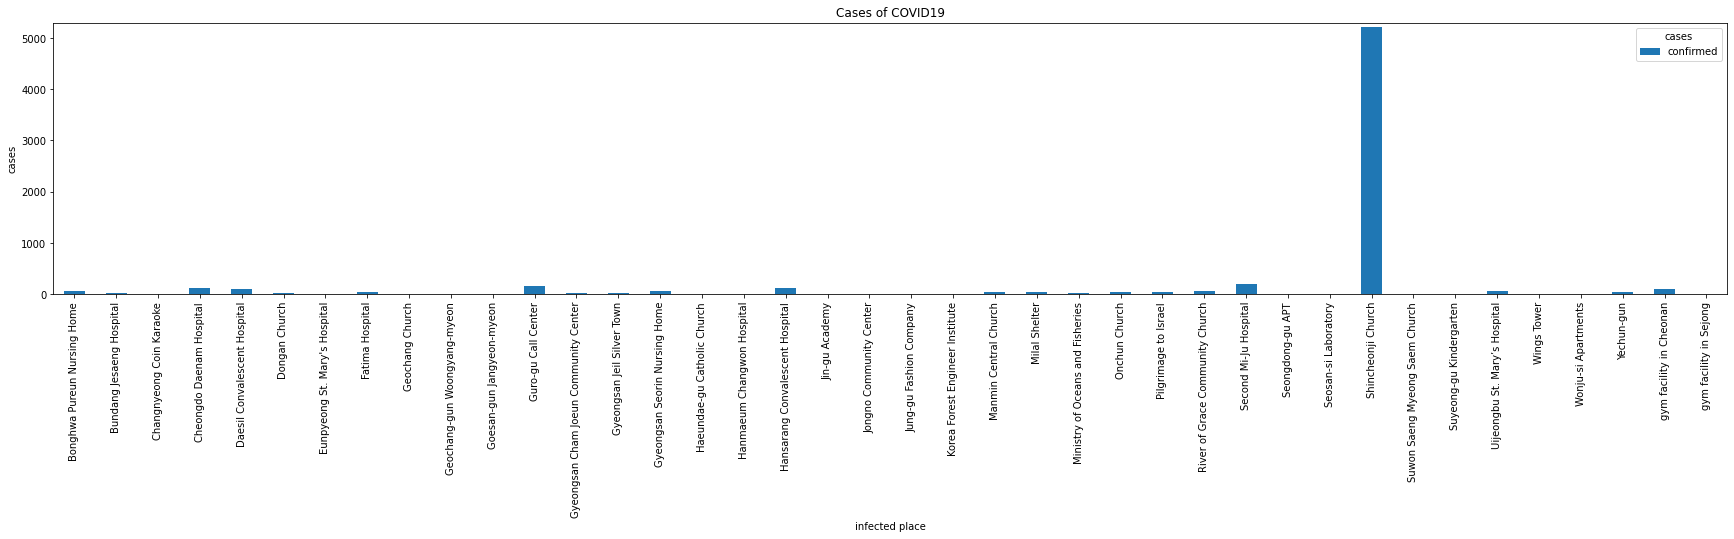

In [0]:
place_infected.plot.bar()
plt.title('Cases of COVID19')
plt.xlabel('infected place')
plt.ylabel('cases')
plt.ylim(0, 5300)
plt.rcParams['figure.figsize'] = [40, 20] # [width, height]
plt.show()

200 이하의 확진자를 가지고 있는 다른 집단 감염 사례와는 달리 신천지 교회에서만 5200명 이상의 확진자가 나온 것을 확인할 수 있다. 

다른 집단감염 사례들의 수치를 자세히 보기 위해 극단치인 신천지교를 제외시키고 그래프를 그려보았다.

cases                                  confirmed
infection_case                                  
Bonghwa Pureun Nursing Home                   68
Bundang Jesaeng Hospital                      22
Changnyeong Coin Karaoke                       7
Cheongdo Daenam Hospital                     123
Daesil Convalescent Hospital                 100
Dongan Church                                 20
Eunpyeong St. Mary's Hospital                 14
Fatima Hospital                               37
Geochang Church                               10
Geochang-gun Woongyang-myeon                   8
Goesan-gun Jangyeon-myeon                     11
Guro-gu Call Center                          166
Gyeongsan Cham Joeun Community Center         16
Gyeongsan Jeil Silver Town                    17
Gyeongsan Seorin Nursing Home                 66
Haeundae-gu Catholic Church                    6
Hanmaeum Changwon Hospital                     7
Hansarang Convalescent Hospital              128
Jin-gu Academy      

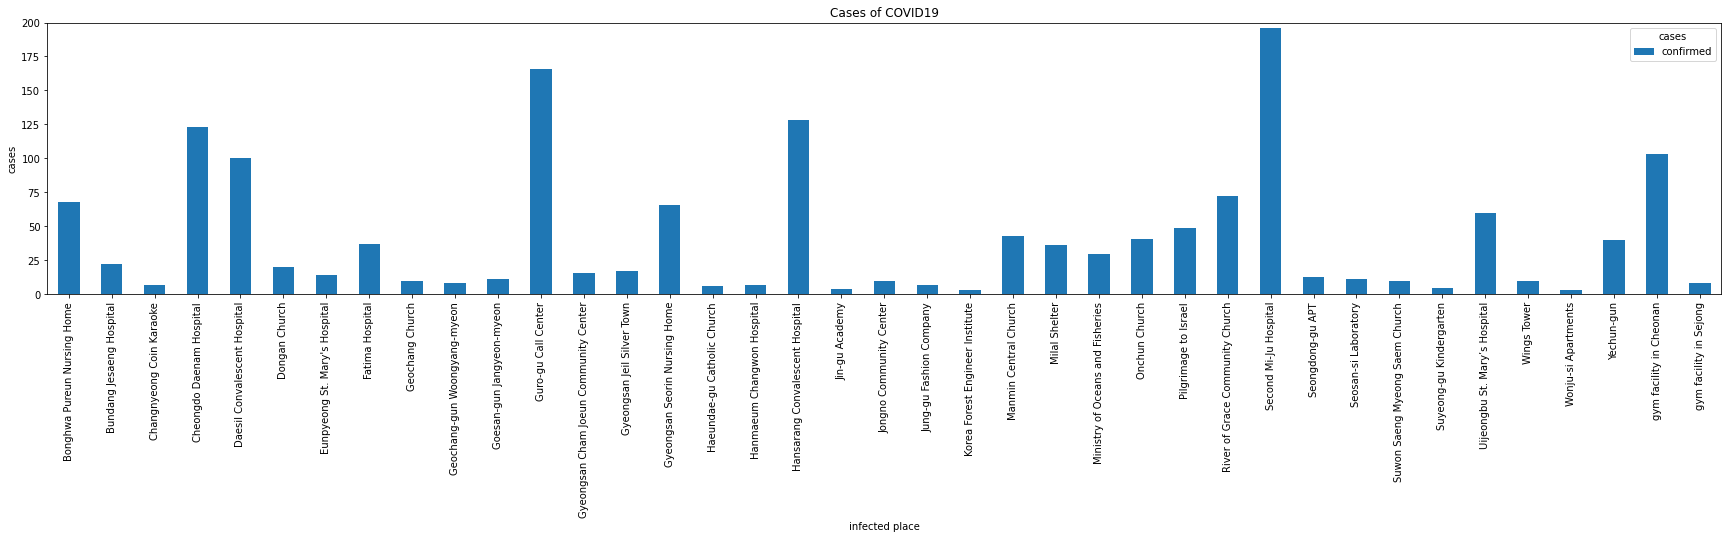

In [0]:
#신천지교를 제외한 집담감염
place_infected2 = place_infected.drop(['Shincheonji Church'])
print(place_infected2)

place_infected2.plot.bar()
plt.title('Cases of COVID19')
plt.xlabel('infected place')
plt.ylabel('cases')
plt.ylim(0, 200)
plt.rcParams['figure.figsize'] = [40, 20] # [width, height]
plt.show()

구로구 콜센터와 신천지 등 집단 감염이 시작된 경우 빠르게 확산된 것을 확인할 수 있었다. 
100명이 넘는 집단감염이 이루어진 곳들은 대부분 병원으로, 사회적 거리두기로 해결하기 어려운 집단이다. 

사회적 거리두기를 통해 집단적 모임을 통한 감염을 최소화하고, 각 병원에서의 방역과 환자를 이송시 일어날 수 있는 2차 감염등에 대한 대비가 필요하다고 느꼈다. 

김태희- 이번 코로나 데이터를 분석하면서 데이터를 시각화 하는 방법과 해당 데이터 분석에 필요한 함수들에 대해 알아갈 수 있었다. 파이썬에서의 pandas 라이브러리가 현재 듣고 있는 데이터베이스 수업의 SQL과 매우 유사하다고 느꼈고, 앞으로 관련 수업들 및 프로젝트들을 통해  데이터에 적합한 분석 방법, 시각화 방법들에 대해 알아가고 싶다. 

정수민- 유동인구의 변화 추이와 코로나 확진자 수의 상관관계를 알고자 시작한 프로젝트였는데 유동인구 데이터의 업데이트가 어느 순간 중단되어 아쉬운 부분이 있었다. 하지만 분석할 수 있는 코드를 짜놓았으니 나중에라도 데이터가 업데이트 된다면 적용하여 제대로 된 결과를 내보고싶다. 많은 정보가 담겨진 데이터에서 내가 원하는 부분만 선택하고 합치는 등의 과정을 거치며 간단하지만 데이터를 처리하는 경험을 한 것만으로도 좋은 경험이 되었다고 생각한다.
 
심채은-데이터를 불러와서 그래프를 그리는 작업을 겨우 할 수 있었는데, 그 그래프 마저도 중요한 정보들을 많이 제거한 상태였다. 데이터 베이스의 사용능력이 많이 떨어진다는 사실을 알고 있었지만 능력을 얻는 것도 쉽지 않은 일임을 꺠달았고, 어떤 것을 공부해야 할 지 구체적으로 알 수 있는 기회였다. 앞으로 공부를 더 하고 다음에 데이터를 만질 때에는 손실되는 데이터 없이 그래프를 만들 수 있었으면 좋겠다.

이율화-개인의 생활영역에서 집단으로 이어지는 감염경로를 사회적 거리두기 실천을 통해 차단할 필요성이 있으며, 의료영역에서 감염자 이송과 의심환자 검사과정에서 격리 및 방역이 잘 이루어지도록 시스템을 보완해야 함을 파악할 수 있었다. 아주 간단한 데이터 분석과 시각화만으로도 현상의 원인과 결과의 상관관계를 파악할 수 있었기에, 이번 프로젝트를 진행하면서 데이터를 만지고 분석하는 것이 모든 과정(프로그래밍, 결과분석 등)에서 큰 역할을 한다는 것을 직접적으로 느낄 수 있었다. 